In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
plt.style.use("ggplot")

In [3]:
train = pd.read_csv("data/raw/train.csv")

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X = train.drop(columns="label").values
y = train["label"].values

We'll use a validation set to find the best value of k, then train the model
on the full train set before submitting predictions. 

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

In [7]:
ks = np.arange(2, 11)
scores = []
for k in ks:
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    scores.append(neigh.score(X_val, y_val))

Text(0, 0.5, 'Accuracy')

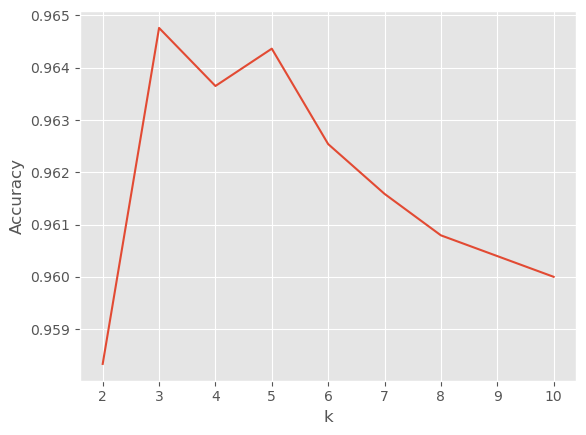

In [8]:
plt.plot(ks, scores)
plt.xticks(ks)
plt.xlabel("k")
plt.ylabel("Accuracy")

In [9]:
test = pd.read_csv("data/raw/test.csv")

In [10]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X_test = test.values

In [12]:
k = ks[np.argmax(scores)]

neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(X, y)
y_test_ = neigh.predict(X_test)

In [32]:
test_predictions = pd.Series(y_test_, name="Label")
test_predictions.index.name = "ImageId"
test_predictions.index += 1 # kaggle expects one indexed predictions

In [33]:
test_predictions.to_csv("data/predictions/knn_baseline.csv")

Submitted on kaggle and got an accuracy of 0.96803